# Visual Introduction to Linear Transformations, Eigenvectors/Eigenvalues, and PCA

This notebook builds geometric intuition first — no prior exposure to linear algebra is required. We'll use pictures to understand:
- What vectors and matrices are
- How matrices act as linear transformations (stretch/rotate/shear)
- What eigenvectors/eigenvalues mean geometrically
- How PCA uses these ideas to find directions of maximum variance

You can change parameters and re-run cells to explore.


<a target="_blank" href="https://colab.research.google.com/github/mayankbakshi/EE443-543/blob/main/PCA_Visual_Intro.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Learning Goals
- See vectors as arrows in the plane and as data points.
- See matrices as machines that transform the plane.
- Recognize eigenvectors as directions that keep their line, only scaled.
- Connect covariance eigenvectors to PCA axes and variance explanation.

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting helpers
def set_equal_aspect(xlim=(-3,3), ylim=(-3,3), title=None, xlabel='x', ylabel='y'):
    plt.axhline(0, color='k', linewidth=0.5)
    plt.axvline(0, color='k', linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(*xlim); plt.ylim(*ylim)
    plt.grid(True, linewidth=0.3, alpha=0.7)
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    if title: plt.title(title)

def plot_vector(v, color='C0', label=None):
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=color)
    if label is not None:
        plt.text(1.04*v[0], 1.04*v[1], label, color=color)

def plot_unit_circle(n=200):
    theta = np.linspace(0, 2*np.pi, n)
    return np.vstack((np.cos(theta), np.sin(theta)))

np.set_printoptions(precision=3, suppress=True)
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['font.size'] = 12
print('Ready!')

Ready!


## Vectors as Arrows and Points
A 2D vector is a pair of numbers, like `[2, 1]`. We can draw it as an arrow from the origin to the point `(2, 1)`.

You can think of vectors as: 
- displacements (arrows), or
- coordinates of data points.

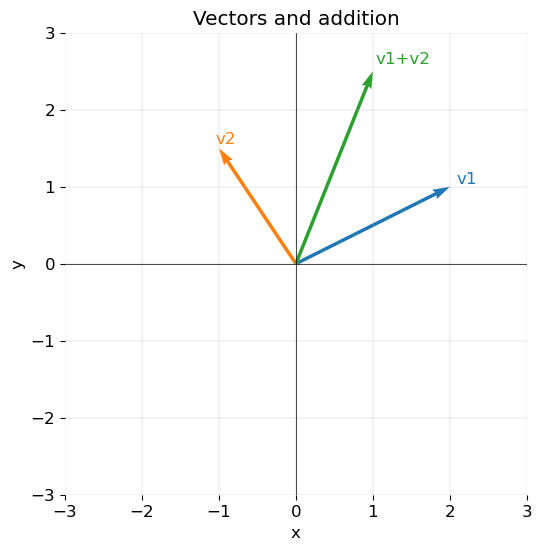

In [47]:
# Visualize a few vectors and their linear combinations
v1 = np.array([2.0, 1.0])
v2 = np.array([-1.0, 1.5])

plt.figure()
plot_vector(v1, color='C0', label='v1')
plot_vector(v2, color='C1', label='v2')
plot_vector(v1 + v2, color='C2', label='v1+v2')
set_equal_aspect(xlim=(-3,3), ylim=(-3,3), title='Vectors and addition')
plt.show()

## Matrices as Transformations
A 2×2 matrix is a rule that takes a vector `[x, y]` and gives a new vector. Geometrically, matrices can rotate, stretch, reflect, or shear the plane.

We will see how a matrix transforms:
- the unit circle (becomes an ellipse), and
- a grid of points.

A =
 [[1.2 0.6]
 [0.2 1.4]]


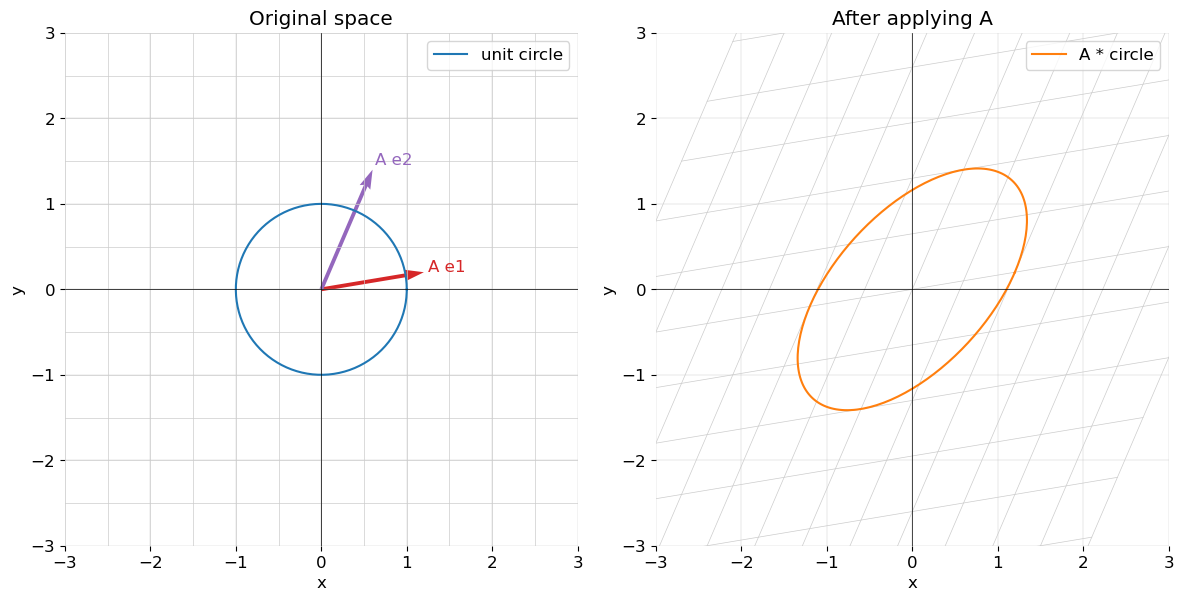

In [48]:
def plot_linear_transform(A, xlim=(-3,3), ylim=(-3,3)):
    circle = plot_unit_circle()
    ellipse = A @ circle

    # Grid
    xs = np.linspace(xlim[0], xlim[1], 13)
    ys = np.linspace(ylim[0], ylim[1], 13)
    grid_pts = []
    for x in xs:
        grid_pts.append(np.vstack((np.full_like(ys, x), ys)))
    for y in ys:
        grid_pts.append(np.vstack((xs, np.full_like(xs, y))))

    # Plot original grid and circle
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    for G in grid_pts:
        plt.plot(G[0], G[1], color='0.8', linewidth=0.5)
    plt.plot(circle[0], circle[1], color='C0', label='unit circle')
    plot_vector(A[:,0], color='C3', label='A e1')
    plot_vector(A[:,1], color='C4', label='A e2')
    set_equal_aspect(xlim, ylim, title='Original space')
    plt.legend(loc='upper right')

    # Plot transformed grid and ellipse
    plt.subplot(1,2,2)
    for G in grid_pts:
        GG = A @ G
        plt.plot(GG[0], GG[1], color='0.8', linewidth=0.5)
    plt.plot(ellipse[0], ellipse[1], color='C1', label='A * circle')
    set_equal_aspect(xlim, ylim, title='After applying A')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

A = np.array([[1.2, 0.6],
              [0.2, 1.4]])
print('A =\n', A)
plot_linear_transform(A)

## Eigenvectors and Eigenvalues (Geometric Meaning)
Some directions (vectors) line up with the transformation and don't turn — they only get stretched or squished. These special directions are eigenvectors, and the stretch factor is the eigenvalue.

Formally: `A v = λ v` means vector `v` stays on its line; it's only scaled by `λ`.

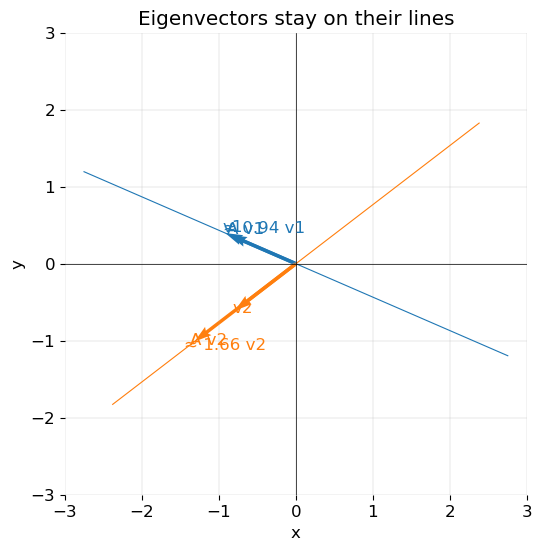

Eigenvalues: [0.939 1.661]
Eigenvectors (columns): [[-0.917 -0.793]
 [ 0.398 -0.609]]


In [49]:
def plot_eigenvectors(A, L=3):
    evals, evecs = np.linalg.eig(A)
    plt.figure()
    for i in range(2):
        v = evecs[:, i].real
        v = v / np.linalg.norm(v)
        Av = A @ v
        t = np.linspace(-L, L, 2)
        plt.plot(t*v[0], t*v[1], linewidth=0.8, color=f'C{i}')
        plot_vector(v, color=f'C{i}', label=f'v{i+1}')
        plot_vector(Av, color=f'C{i}', label=f'A v{i+1}')
        plt.text(1.1*Av[0], 1.1*Av[1], f'≈ {evals[i]:.2f} v{i+1}', color=f'C{i}')
    set_equal_aspect(xlim=(-L,L), ylim=(-L,L), title='Eigenvectors stay on their lines')
    plt.show()
    print('Eigenvalues:', np.round(evals,3))
    print('Eigenvectors (columns):', np.round(evecs,3))

plot_eigenvectors(A)

## Power Iteration (Finding the Main Direction)
Power iteration repeatedly applies `A` to a vector, normalizing each time. For many matrices, this converges to the direction of the largest eigenvalue.

This explains why PCA looks for the direction of maximum variance: it’s the principal eigenvector of the covariance matrix.

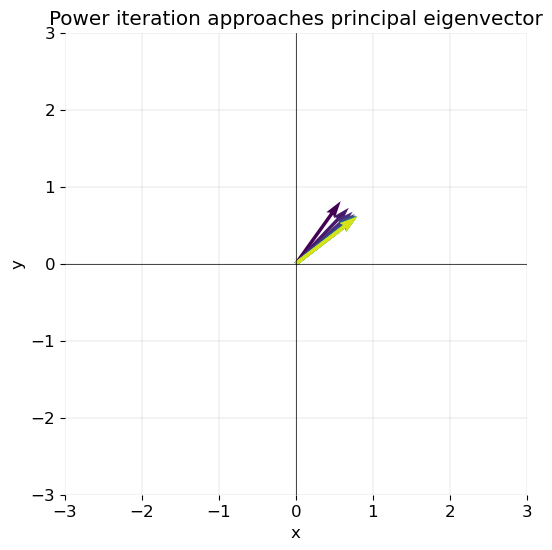

In [50]:
def power_iteration(A, iters=12):
    w = np.random.randn(2)
    w = w / np.linalg.norm(w)
    traj = [w.copy()]
    for _ in range(iters):
        w = A @ w
        w = w / np.linalg.norm(w)
        traj.append(w.copy())
    return np.array(traj)

traj = power_iteration(A, iters=15)
plt.figure()
for i, w in enumerate(traj):
    plot_vector(w, color=plt.cm.viridis(i/len(traj)))
set_equal_aspect(title='Power iteration approaches principal eigenvector')
plt.show()

## From Transformations to PCA
- A dataset of 2D points has a center (mean) and a *covariance matrix* `Σ`.
- The eigenvectors of `Σ` define the principal directions (PCA axes).
- The eigenvalues tell how much variance lies along each axis.

We will generate an elongated cloud of points, compute `Σ`, and visualize PCA.

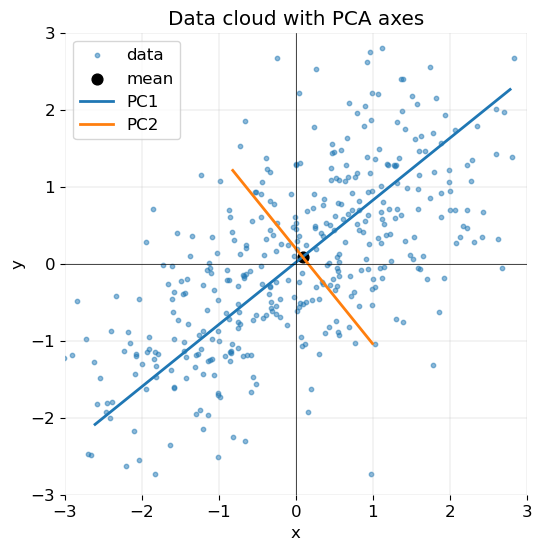

Eigenvalues (variances): [2.999 0.521]
Explained variance ratio: [0.852 0.148]


In [51]:
# Generate correlated 2D data
rng = np.random.default_rng(0)
mean = np.array([0.0, 0.0])
C = np.array([[2.0, 1.2],
              [1.2, 1.5]])  # covariance used to sample data
X = rng.multivariate_normal(mean, C, size=400)

# Compute empirical mean and covariance
mu = X.mean(axis=0)
Xc = X - mu
Sigma = (Xc.T @ Xc) / (len(Xc) - 1)
evals, evecs = np.linalg.eig(Sigma)
order = np.argsort(evals)[::-1]
evals = evals[order].real
evecs = evecs[:, order].real
explained = evals / evals.sum()

# Plot data cloud with PCA axes
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=10, alpha=0.5, label='data')
plt.scatter([mu[0]], [mu[1]], s=60, c='k', label='mean')
for i in range(2):
    v = evecs[:, i]
    length = 2*np.sqrt(evals[i])  # scale by variance for visibility
    a = mu - length*v
    b = mu + length*v
    plt.plot([a[0], b[0]], [a[1], b[1]], linewidth=2, label=f'PC{i+1}')
set_equal_aspect(title='Data cloud with PCA axes')
plt.legend()
plt.show()

print('Eigenvalues (variances):', np.round(evals,3))
print('Explained variance ratio:', np.round(explained,3))

## Projection and Reconstruction
Projecting onto the first principal component (PC1) gives a one-number summary per point. Mapping back along PC1 gives a rank-1 approximation of the data.

We visualize each point and its orthogonal projection onto PC1.

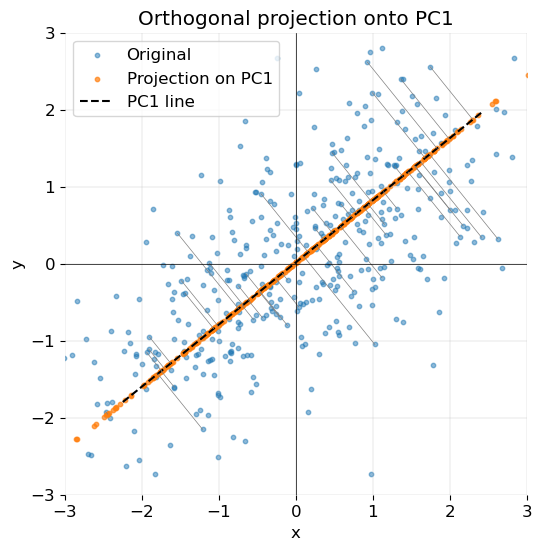

In [52]:
pc1 = evecs[:, 0]
scores1 = Xc @ pc1
X_recon1 = mu + np.outer(scores1, pc1)

# Plot original points, their projections, and connecting segments
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=10, alpha=0.5, label='Original')
plt.scatter(X_recon1[:,0], X_recon1[:,1], s=10, alpha=0.7, label='Projection on PC1')
line_pts = np.vstack([mu - 3*pc1, mu + 3*pc1])
plt.plot(line_pts[:,0], line_pts[:,1], linestyle='--', color='k', label='PC1 line')
# Draw a small subset of connectors for clarity
for i in range(0, len(X), len(X)//40):
    plt.plot([X[i,0], X_recon1[i,0]], [X[i,1], X_recon1[i,1]], linewidth=0.5, color='0.5')
set_equal_aspect(title='Orthogonal projection onto PC1')
plt.legend()
plt.show()

## Try It Yourself
Change the matrix `A` and see how it transforms the plane and its eigenvectors. Then regenerate data with a different covariance and observe how PCA axes change.

If you know `ipywidgets`, you can wrap these as sliders.

A_test =
 [[ 1.   0.8]
 [-0.4  1.2]]


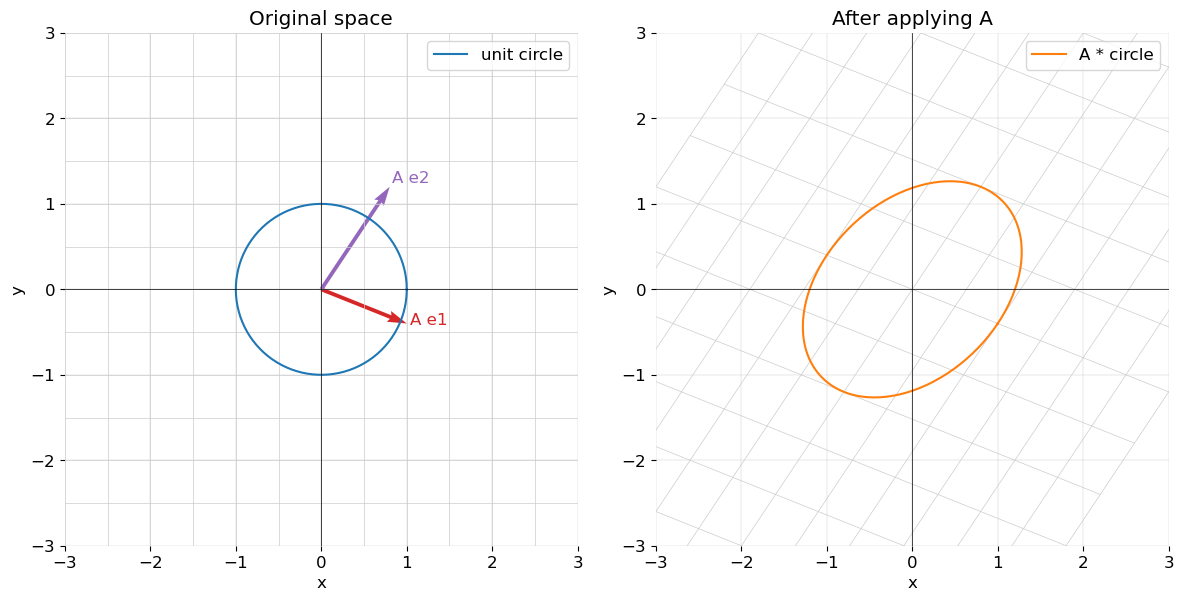

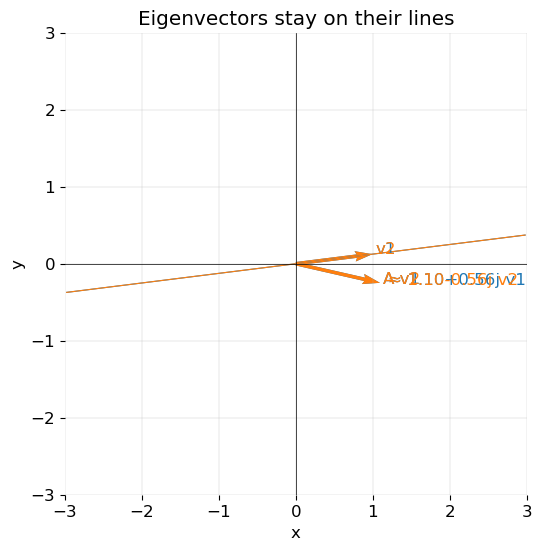

Eigenvalues: [1.1+0.557j 1.1-0.557j]
Eigenvectors (columns): [[0.816+0.j    0.816-0.j   ]
 [0.102+0.568j 0.102-0.568j]]


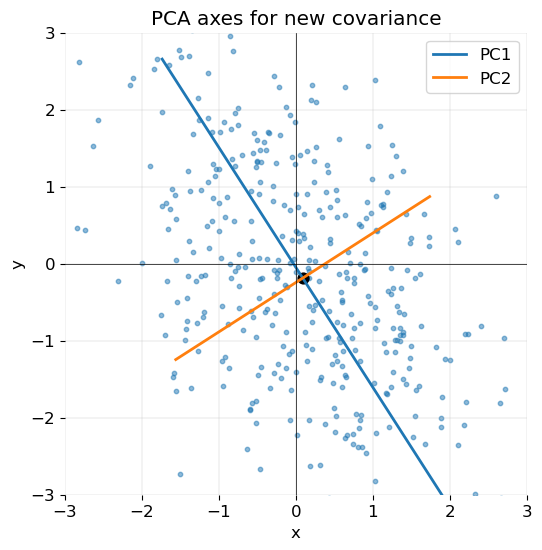

Explained variance ratio: [0.748 0.252]


In [53]:
# 1) Explore different 2x2 matrices
A_test = np.array([[1.0, 0.8],
                   [-0.4, 1.2]])
print('A_test =\n', A_test)
plot_linear_transform(A_test)
plot_eigenvectors(A_test)

# 2) Explore different data covariances
C_test = np.array([[1.5, -0.9],
                   [-0.9, 2.5]])
rng = np.random.default_rng(1)
X2 = rng.multivariate_normal([0,0], C_test, size=400)
mu2 = X2.mean(axis=0); X2c = X2 - mu2
Sigma2 = (X2c.T @ X2c) / (len(X2c)-1)
evals2, evecs2 = np.linalg.eig(Sigma2)
order2 = np.argsort(evals2)[::-1]
evals2 = evals2[order2].real; evecs2 = evecs2[:, order2].real
plt.figure(figsize=(6,6))
plt.scatter(X2[:,0], X2[:,1], s=10, alpha=0.5)
plt.scatter([mu2[0]], [mu2[1]], s=60, c='k')
for i in range(2):
    v = evecs2[:, i]
    L = 2*np.sqrt(evals2[i])
    a = mu2 - L*v; b = mu2 + L*v
    plt.plot([a[0], b[0]],[a[1], b[1]], linewidth=2, label=f'PC{i+1}')
set_equal_aspect(title='PCA axes for new covariance')
plt.legend(); plt.show()
print('Explained variance ratio:', np.round(evals2/evals2.sum(), 3))

## Summary
- Vectors are arrows/points; matrices transform the plane.
- Eigenvectors are special directions that keep their line; eigenvalues are the stretch factors.
- PCA computes the covariance matrix’s eigenvectors to find directions of greatest variance.
- Projections onto PCA axes compress data while keeping the most structure.